# DiploDatos 2020 - Coronavirus en Argentina

El dataset se encuetra en:

https://github.com/lucia15/Datos-Covid19-Argentina

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Práctico Introducción al Machine Learning

**Consigna:**

Proponer un modelo de Aprendizaje Automático para estos datos. 

Para ello deberan explorar y probar varios modelos, buscando las configuraciones que mejores resultados den. Tener en cuenta:

* Elección de la variable objetivo y features
* Selección de un modelo
* Ajuste de hiperparámetros 
* Evaluación

Veamos unos sencillos (e incompletos) **ejemplos**.

### Carga de datos

In [2]:
# Importamos librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Experimentación con el dataset: Covid19Casos

##### Dataset - Covid19Casos
- Source: http://datos.salud.gob.ar/dataset/covid-19-casos-registrados-en-la-republica-argentina/archivo/fd657d02-a33a-498b-a91b-2ef1a68b8d16

In [3]:
url = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv'

df = pd.read_csv(url, error_bad_lines=False)

In [4]:
dataset = df.copy(deep=True)

In [5]:
dataset.head(10)

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-10-14
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-10-14
2,1000003,F,40.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-10-14
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-10-14
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - Con muestra sin resultado co...,Sospechoso,6,NaN,515,2020-10-14
5,1000007,M,26.0,Años,Argentina,Formosa,Patiño,Formosa,NaN,2020-06-01,...,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-25,35,2020-10-14
6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,2020-06-01,...,NaN,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0,2020-10-14
7,1000009,M,73.0,Años,Argentina,Buenos Aires,Esteban Echeverría,Buenos Aires,2020-05-31,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,6,2020-06-02,260,2020-10-14
8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,NaN,2020-06-01,...,NaN,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7,2020-10-14
9,1000011,M,42.0,Años,Argentina,Santa Fe,Rosario,Santa Fe,NaN,2020-06-01,...,NaN,NO,82,Público,Caso Descartado,Descartado,82,2020-06-01,84,2020-10-14


In [6]:
dataset.shape

(2327033, 25)

In [7]:
dataset.isnull().count()

id_evento_caso                      2327033
sexo                                2327033
edad                                2327033
edad_años_meses                     2327033
residencia_pais_nombre              2327033
residencia_provincia_nombre         2327033
residencia_departamento_nombre      2327033
carga_provincia_nombre              2327033
fecha_inicio_sintomas               2327033
fecha_apertura                      2327033
sepi_apertura                       2327033
fecha_internacion                   2327033
cuidado_intensivo                   2327033
fecha_cui_intensivo                 2327033
fallecido                           2327033
fecha_fallecimiento                 2327033
asistencia_respiratoria_mecanica    2327033
carga_provincia_id                  2327033
origen_financiamiento               2327033
clasificacion                       2327033
clasificacion_resumen               2327033
residencia_provincia_id             2327033
fecha_diagnostico               

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327033 entries, 0 to 2327032
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [9]:
dataset['fecha_inicio_sintomas'] = pd.to_datetime(dataset['fecha_inicio_sintomas'], format='%Y-%m-%d')
dataset['fecha_apertura'] = pd.to_datetime(dataset['fecha_apertura'], format='%Y-%m-%d')
dataset['fecha_internacion'] = pd.to_datetime(dataset['fecha_internacion'], format='%Y-%m-%d')
dataset['fecha_cui_intensivo'] = pd.to_datetime(dataset['fecha_cui_intensivo'], format='%Y-%m-%d')
dataset['fecha_fallecimiento'] = pd.to_datetime(dataset['fecha_fallecimiento'], format='%Y-%m-%d')
dataset['fecha_diagnostico'] = pd.to_datetime(dataset['fecha_diagnostico'], format='%Y-%m-%d')

## Limpieza, Preprocesado y Feature Engineering

In [10]:
dataset.convert_dtypes().dtypes

id_evento_caso                               Int64
sexo                                        string
edad                                         Int64
edad_años_meses                             string
residencia_pais_nombre                      string
residencia_provincia_nombre                 string
residencia_departamento_nombre              string
carga_provincia_nombre                      string
fecha_inicio_sintomas               datetime64[ns]
fecha_apertura                      datetime64[ns]
sepi_apertura                                Int64
fecha_internacion                   datetime64[ns]
cuidado_intensivo                           string
fecha_cui_intensivo                 datetime64[ns]
fallecido                                   string
fecha_fallecimiento                 datetime64[ns]
asistencia_respiratoria_mecanica            string
carga_provincia_id                           Int64
origen_financiamiento                       string
clasificacion                  

### Sexo

F     1181319
M     1137948
NR       7766
Name: sexo, dtype: int64

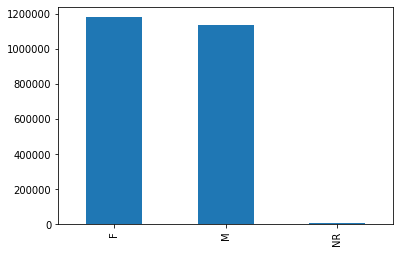

In [11]:
dataset.sexo.value_counts().plot.bar()
dataset.sexo.value_counts()

In [12]:
### One Hot Encoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['sexo'], prefix='sexo')],axis=1).drop(['sexo'], axis=1)

In [13]:
dataset = dataset.rename(columns={"sexo_F": "sexo_f", 
                                  "sexo_M": "sexo_m",
                                  "sexo_NR": "sexo_nr"})

### Edad

In [14]:
# Paso meses a años (cuando la edad está expresada en meses)
dataset['edad'].loc[dataset.edad_años_meses == 'Meses'] = 0

/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
# Eliminamos la columna edad_años_meses
dataset.drop(['edad_años_meses'], axis=1, inplace=True)

### Lugares

#### País

Argentina          2234447
SIN ESPECIFICAR      92174
Paraguay               108
Bolivia                 90
Brasil                  51
Chile                   46
Uruguay                 31
Italia                  14
Perú                    11
Alemania                 9
Francia                  8
España                   8
Venezuela                5
China                    5
Reino Unido              3
Australia                3
EE.UU.                   3
Austria                  2
Ecuador                  2
Malasia                  2
Colombia                 2
Panamá                   1
Polonia                  1
Canadá                   1
Portugal                 1
Líbano                   1
Ucrania                  1
Irlanda                  1
Filipinas                1
Bélgica                  1
Name: residencia_pais_nombre, dtype: int64

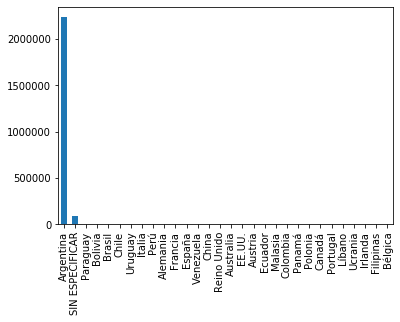

In [16]:
dataset.residencia_pais_nombre.value_counts().plot.bar()
dataset.residencia_pais_nombre.value_counts()

In [17]:
cant_total = dataset.shape[0]
cant_arg = dataset[dataset.residencia_pais_nombre == "Argentina"].shape[0]
porcentaje = (cant_arg * 100) / cant_total

print('Cantidad de registros donde el país de residencia es Argentina: {0} ({1}%)'.format(cant_arg, round(porcentaje, 2)))

Cantidad de registros donde el país de residencia es Argentina: 2234447 (96.02%)


- Se conservan sólo los datos de personas residentes en Argentina

In [18]:
dataset.drop(dataset[dataset.residencia_pais_nombre != "Argentina"].index, inplace=True)

In [19]:
#Elimino la columna país porque todos los registros tienen el mismo valor
dataset.drop(['residencia_pais_nombre'], axis=1, inplace=True)

#### carga_provincia_nombre

In [20]:
cant_iguales = dataset[dataset.residencia_provincia_nombre == dataset.carga_provincia_nombre].shape[0]
porcentaje = (cant_iguales * 100) / cant_total

print('Cantidad de registros donde la provincia de residencia es igual a la de carga: {0} ({1}%)'.format(cant_iguales, round(porcentaje, 2)))

Cantidad de registros donde la provincia de residencia es igual a la de carga: 1910998 (82.12%)


Buenos Aires           885726
CABA                   632102
Santa Fe               125047
Córdoba                112774
Mendoza                 73593
Tucumán                 60336
Chaco                   52140
Jujuy                   41023
Río Negro               33969
Salta                   32044
Neuquén                 28657
Entre Ríos              24417
Santiago del Estero     23440
Chubut                  17198
La Rioja                16613
Tierra del Fuego        15104
Santa Cruz              14163
Corrientes              12733
San Luis                10104
La Pampa                 8003
Catamarca                6706
Misiones                 4462
San Juan                 2890
Formosa                  1203
Name: carga_provincia_nombre, dtype: int64

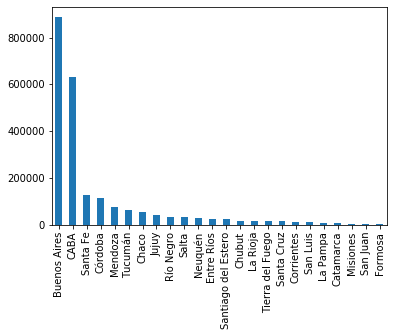

In [21]:
dataset.carga_provincia_nombre.value_counts().plot.bar()
dataset.carga_provincia_nombre.value_counts()

In [22]:
# Feature engineer => agregar columna que tenga un 1 si la pcia de carga es la misma y un 0 sino
dataset['pcia_rec_eq_pcia_car'] = (dataset['residencia_provincia_nombre'] == dataset['carga_provincia_nombre'])
dataset['pcia_rec_eq_pcia_car'] = dataset['pcia_rec_eq_pcia_car'].astype(int)

In [23]:
dataset[['id_evento_caso', 'residencia_provincia_nombre', 'carga_provincia_nombre', 'pcia_rec_eq_pcia_car']]

,id_evento_caso,residencia_provincia_nombre,carga_provincia_nombre,pcia_rec_eq_pcia_car
0,1000000,CABA,Buenos Aires,0
1,1000002,Buenos Aires,Buenos Aires,1
2,1000003,Córdoba,Córdoba,1
3,1000005,Mendoza,Mendoza,1
4,1000006,Buenos Aires,Buenos Aires,1
...,...,...,...,...
2327028,999994,Tierra del Fuego,Tierra del Fuego,1
2327029,999995,Formosa,Formosa,1
2327030,999996,CABA,CABA,1
2327031,999997,CABA,Córdoba,0


In [24]:
#Elimino la columna país porque todos los registros tienen el mismo valor
dataset.drop(['carga_provincia_nombre'], axis=1, inplace=True)

#### Provincia

Buenos Aires           1109300
CABA                    396571
Santa Fe                124303
Córdoba                 114909
Mendoza                  73896
Tucumán                  60128
Chaco                    52027
Jujuy                    40727
Río Negro                35002
Salta                    32360
Neuquén                  28059
Entre Ríos               25467
Santiago del Estero      23632
Chubut                   17910
La Rioja                 16567
Tierra del Fuego         15336
Santa Cruz               14518
Corrientes               13386
San Luis                 10413
La Pampa                  8303
Catamarca                 6691
Misiones                  5638
SIN ESPECIFICAR           4598
San Juan                  3213
Formosa                   1493
Name: residencia_provincia_nombre, dtype: int64

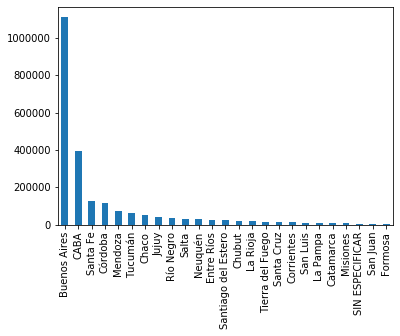

In [25]:
dataset.residencia_provincia_nombre.value_counts().plot.bar()
dataset.residencia_provincia_nombre.value_counts()

In [26]:
dataset.drop(dataset[dataset.residencia_provincia_nombre == "SIN ESPECIFICAR"].index, inplace=True)

In [27]:
### One Hot Encoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['residencia_provincia_nombre'], prefix='residencia_provincia')],axis=1).drop(['residencia_provincia_nombre'], axis=1)

In [28]:
# Rename columns 

columns = {
    'residencia_provincia_Buenos Aires': 'residencia_provincia_buenos_aires',
    'residencia_provincia_CABA': 'residencia_provincia_caba',
    'residencia_provincia_Catamarca': 'residencia_provincia_catamarca',
    'residencia_provincia_Chaco': 'residencia_provincia_chaco',
    'residencia_provincia_Chubut': 'residencia_provincia_chubut',
    'residencia_provincia_corrientes': 'residencia_provincia_corrientes',
    'residencia_provincia_Córdoba': 'residencia_provincia_cordoba',
    'residencia_provincia_Entre Ríos': 'residencia_provincia_entre_rios',
    'residencia_provincia_Formosa': 'residencia_provincia_formosa',
    'residencia_provincia_Jujuy': 'residencia_provincia_jujuy',
    'residencia_provincia_La Pampa': 'residencia_provincia_la_pampa',
    'residencia_provincia_La Rioja': 'residencia_provincia_la_rioja',
    'residencia_provincia_Mendoza': 'residencia_provincia_mendoza',
    'residencia_provincia_Misiones': 'residencia_provincia_misiones',
    'residencia_provincia_Neuquén': 'residencia_provincia_neuquen',
    'residencia_provincia_Río Negro': 'residencia_provincia_rio_negro',
    'residencia_provincia_Salta': 'residencia_provincia_salta',
    'residencia_provincia_San Juan': 'residencia_provincia_san_juan',
    'residencia_provincia_San Luis': 'residencia_provincia_san_luis',
    'residencia_provincia_Santa Cruz': 'residencia_provincia_santa_cruz',
    'residencia_provincia_Santa Fe': 'residencia_provincia_santa_fe',
    'residencia_provincia_Santiago del Estero': 'residencia_provincia_santiago_del_estero',
    'residencia_provincia_Tierra del Fuego': 'residencia_provincia_tierra_del_fuego',
    'residencia_provincia_Tucumán': 'residencia_provincia_tucuman'
}

dataset = dataset.rename(columns=columns)

#### Departamento

In [29]:
dataset.residencia_departamento_nombre.unique().shape

(446,)

In [30]:
# Eliminamos la columna residencia_departamento_nombre
dataset.drop(['residencia_departamento_nombre'], axis=1, inplace=True)

- Se descarta el departamento porque agrega demasiada dispersión (445 nuevas columnas de One Hot Encoder)

#### Eliminamos las columnas de lugares no necesarias: las que incluyen id's

In [31]:
dataset.drop(['carga_provincia_id'], axis=1, inplace=True)
dataset.drop(['residencia_provincia_id'], axis=1, inplace=True)
dataset.drop(['residencia_departamento_id'], axis=1, inplace=True)

### Fechas

#### Análisis de nulos en fechas

In [32]:
print('fecha_inicio_sintomas')
print(dataset.fecha_inicio_sintomas.isnull().value_counts())
print('*' * 50)
print('fecha_apertura')
print(dataset.fecha_apertura.isnull().value_counts())
print('*' * 50)
print('fecha_internacion')
print(dataset.fecha_internacion.isnull().value_counts())
print('*' * 50)
print('fecha_cui_intensivo')
print(dataset.fecha_cui_intensivo.isnull().value_counts())
print('*' * 50)
print('fecha_diagnostico')
print(dataset.fecha_diagnostico.isnull().value_counts())

fecha_inicio_sintomas
False    1212521
True     1017328
Name: fecha_inicio_sintomas, dtype: int64
**************************************************
fecha_apertura
False    2229848
True           1
Name: fecha_apertura, dtype: int64
**************************************************
fecha_internacion
True     2058100
False     171749
Name: fecha_internacion, dtype: int64
**************************************************
fecha_cui_intensivo
True     2204694
False      25155
Name: fecha_cui_intensivo, dtype: int64
**************************************************
fecha_diagnostico
False    1926597
True      303252
Name: fecha_diagnostico, dtype: int64


#### Análisis fechas iguales

#### fecha_inicio_sintomas

In [33]:
cant_ap = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_apertura].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_apertura: ', cant_ap)

cant_int = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_internacion].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_internacion : ', cant_int)

cant_cui = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_cui_intensivo].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_cui_intensivo: ', cant_cui)

cant_di = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_diagnostico: ', cant_di)

Cantidad iguales fecha_inicio_sintomas y fecha_apertura:  59823
Cantidad iguales fecha_inicio_sintomas y fecha_internacion :  34305
Cantidad iguales fecha_inicio_sintomas y fecha_cui_intensivo:  6649
Cantidad iguales fecha_inicio_sintomas y fecha_diagnostico:  23612


#### fecha_apertura

In [34]:
cant_int_2 = dataset[dataset.fecha_apertura == dataset.fecha_internacion].shape[0]
print('Cantidad iguales fecha_apertura y fecha_internacion: ', cant_int_2)

cant_cui_2 = dataset[dataset.fecha_apertura == dataset.fecha_cui_intensivo ].shape[0]
print('Cantidad iguales fecha_apertura y fecha_cui_intensivo: ', cant_cui_2)

cant_di_2 = dataset[dataset.fecha_apertura == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_apertura y fecha_diagnostico: ', cant_di_2)

Cantidad iguales fecha_apertura y fecha_internacion:  64481
Cantidad iguales fecha_apertura y fecha_cui_intensivo:  7132
Cantidad iguales fecha_apertura y fecha_diagnostico:  670330


#### fecha_internacion

In [35]:
cant_cui_3 = dataset[dataset.fecha_internacion == dataset.fecha_cui_intensivo ].shape[0]
print('Cantidad iguales fecha_internacion y fecha_cui_intensivo: ', cant_cui_3)

cant_di_3 = dataset[dataset.fecha_internacion == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_internacion y fecha_diagnostico: ', cant_di_3)

Cantidad iguales fecha_internacion y fecha_cui_intensivo:  20489
Cantidad iguales fecha_internacion y fecha_diagnostico:  26740


#### fecha_cui_intensivo

In [36]:
cant_di_4 = dataset[dataset.fecha_cui_intensivo == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_cui_intensivo y fecha_diagnostico: ', cant_di_4)

Cantidad iguales fecha_cui_intensivo y fecha_diagnostico:  2909


### Creación de columnas

#### fecha_inicio_sintomas

False    1212520
True     1017329
Name: fecha_ap_dif_fecha_in, dtype: int64

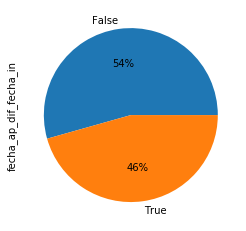

In [37]:
#Crear columna: fecha_apertura - fecha_inicio_sintomas 
dataset['fecha_ap_dif_fecha_in'] = dataset.fecha_apertura - dataset.fecha_inicio_sintomas 
dataset['fecha_ap_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_ap_dif_fecha_in'].isnull().value_counts()

True     2071737
False     158112
Name: fecha_int_dif_fecha_in, dtype: int64

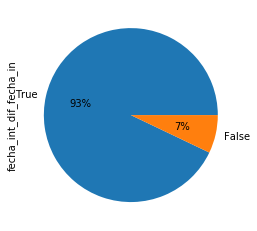

In [38]:
#Crear columna: fecha_internacion - fecha_inicio_sintomas 
dataset['fecha_int_dif_fecha_in'] = dataset.fecha_internacion - dataset.fecha_inicio_sintomas 
dataset['fecha_int_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_int_dif_fecha_in'].isnull().value_counts()

True     2206218
False      23631
Name: fecha_cui_dif_fecha_in, dtype: int64

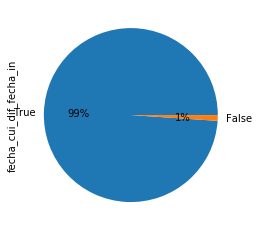

In [39]:
#Crear columna: fecha_cui_intensivo - fecha_inicio_sintomas 
dataset['fecha_cui_dif_fecha_in'] = dataset.fecha_cui_intensivo - dataset.fecha_inicio_sintomas 
dataset['fecha_cui_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_cui_dif_fecha_in'].isnull().value_counts()

True     1173536
False    1056313
Name: fecha_di_dif_fecha_in, dtype: int64

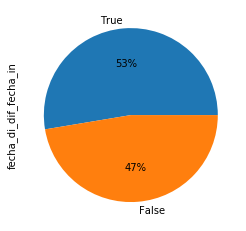

In [40]:
#Crear columna: fecha_diagnostico - fecha_inicio_sintomas 
dataset['fecha_di_dif_fecha_in'] = dataset.fecha_diagnostico  - dataset.fecha_inicio_sintomas 
dataset['fecha_di_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_in'].isnull().value_counts()

#### fecha_apertura 

True     2058100
False     171749
Name: fecha_int_dif_fecha_ap, dtype: int64

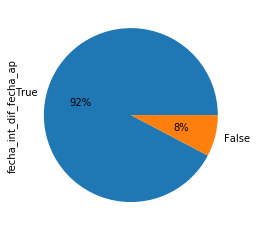

In [41]:
#Crear columna: fecha_internacion - fecha_apertura
dataset['fecha_int_dif_fecha_ap'] = dataset.fecha_internacion - dataset.fecha_apertura 
dataset['fecha_int_dif_fecha_ap'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_int_dif_fecha_ap'].isnull().value_counts()

True     2204694
False      25155
Name: fecha_cui_dif_fecha_ap, dtype: int64

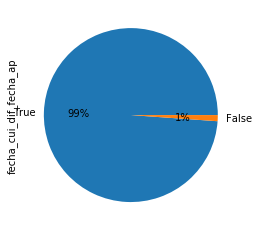

In [42]:
#Crear columna: fecha_cui_intensivo - fecha_apertura
dataset['fecha_cui_dif_fecha_ap'] = dataset.fecha_cui_intensivo - dataset.fecha_apertura
dataset['fecha_cui_dif_fecha_ap'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_cui_dif_fecha_ap'].isnull().value_counts()

### Elegido: fecha_diagnostico - fecha_apertura

False    1926596
True      303253
Name: fecha_di_dif_fecha_ap, dtype: int64

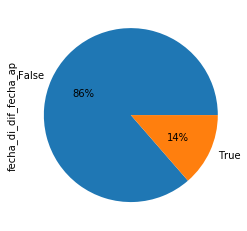

In [43]:
#Crear columna: fecha_diagnostico - fecha_apertura
dataset['fecha_di_dif_fecha_ap'] = dataset.fecha_diagnostico - dataset.fecha_apertura
dataset['fecha_di_dif_fecha_ap'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_ap'].isnull().value_counts()

#### fecha_internacion

True     2205176
False      24673
Name: fecha_cui_dif_fecha_int, dtype: int64

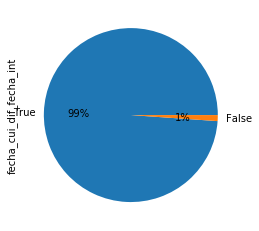

In [44]:
#Crear columna: fecha_cui_intensivo - fecha_internacion
dataset['fecha_cui_dif_fecha_int'] = dataset.fecha_cui_intensivo - dataset.fecha_internacion
dataset['fecha_cui_dif_fecha_int'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_cui_dif_fecha_int'].isnull().value_counts()

True     2068626
False     161223
Name: fecha_di_dif_fecha_int, dtype: int64

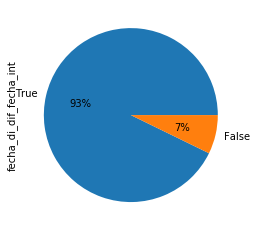

In [45]:
#Crear columna: fecha_diagnostico  - fecha_internacion
dataset['fecha_di_dif_fecha_int'] = dataset.fecha_diagnostico - dataset.fecha_internacion
dataset['fecha_di_dif_fecha_int'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_int'].isnull().value_counts()

#### fecha_cui_intensivo

True     2206115
False      23734
Name: fecha_di_dif_fecha_cui, dtype: int64

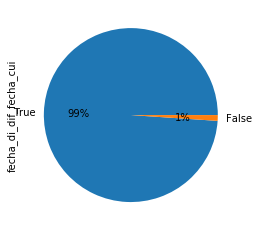

In [46]:
#Crear columna: fecha_cui_intensivo - fecha_apertura
dataset['fecha_di_dif_fecha_cui'] = dataset.fecha_diagnostico - dataset.fecha_cui_intensivo
dataset['fecha_di_dif_fecha_cui'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_cui'].isnull().value_counts()

#### Eliminamos las fechas que no vamos a usar: dejamos sólo la columna fecha_di_dif_fecha_ap

In [47]:
dataset.drop(['fecha_inicio_sintomas'], axis=1, inplace=True)
dataset.drop(['fecha_apertura'], axis=1, inplace=True)
dataset.drop(['fecha_internacion'], axis=1, inplace=True)
dataset.drop(['fecha_cui_intensivo'], axis=1, inplace=True)
dataset.drop(['fecha_diagnostico'], axis=1, inplace=True)
dataset.drop(['fecha_ap_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_int_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_cui_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_di_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_int_dif_fecha_ap'], axis=1, inplace=True)
dataset.drop(['fecha_cui_dif_fecha_ap'], axis=1, inplace=True)
dataset.drop(['fecha_cui_dif_fecha_int'], axis=1, inplace=True)
dataset.drop(['fecha_di_dif_fecha_int'], axis=1, inplace=True)
dataset.drop(['fecha_di_dif_fecha_cui'], axis=1, inplace=True)

dataset.drop(['ultima_actualizacion'], axis=1, inplace=True)

In [48]:
### Eliminamos la fecha de fallecido ya que si la variable target e4s fallecido, estaríamos introduciendo información a posteriori en el modelo
dataset.drop(['fecha_fallecimiento'], axis=1, inplace=True)

In [49]:
# Transformamos el valor de esta nueva característica en numérico
dataset['fecha_di_dif_fecha_ap'] = dataset['fecha_di_dif_fecha_ap'].astype('timedelta64[D]')

In [50]:
# Eliminamos los registros que no tienen valor en la columna fecha_di_dif_fecha_ap
dataset.drop(dataset[np.isnan(dataset.fecha_di_dif_fecha_ap)].index, inplace=True)

### sepi_apertura

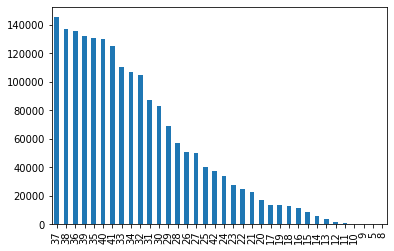

In [51]:
dataset.sepi_apertura.value_counts().plot.bar()

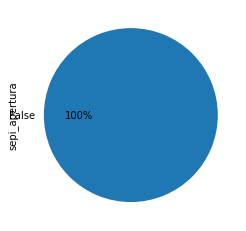

In [52]:
dataset.sepi_apertura.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

### cuidado_intensivo

In [53]:
dataset['cuidado_intensivo'].unique()

array(['NO', 'SI'], dtype=object)

In [54]:
# Binarización de la variable
dataset['cuidado_intensivo'] = (dataset['cuidado_intensivo'] == "SI")
dataset['cuidado_intensivo'] = dataset['cuidado_intensivo'].astype(int)

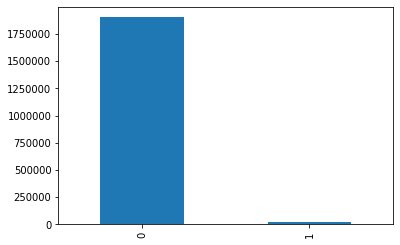

In [55]:
dataset.cuidado_intensivo.value_counts().plot.bar()

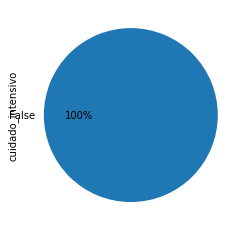

In [56]:
dataset.cuidado_intensivo.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

In [57]:
dataset.cuidado_intensivo.unique()

array([0, 1])

### asistencia_respiratoria_mecanica 

In [58]:
dataset['asistencia_respiratoria_mecanica'].unique()

array(['NO', 'SI'], dtype=object)

In [59]:
# Binarización de la variable
dataset['asistencia_respiratoria_mecanica'] = (dataset['asistencia_respiratoria_mecanica'] == "SI")
dataset['asistencia_respiratoria_mecanica'] = dataset['asistencia_respiratoria_mecanica'].astype(int)

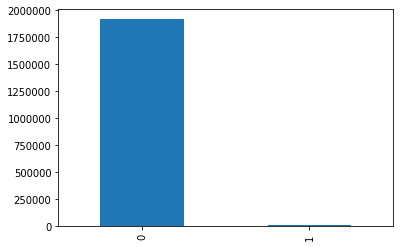

In [60]:
dataset.asistencia_respiratoria_mecanica.value_counts().plot.bar()

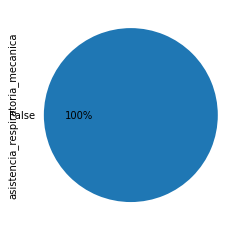

In [61]:
dataset.asistencia_respiratoria_mecanica.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

In [62]:
dataset.asistencia_respiratoria_mecanica.unique()

array([0, 1])

### origen_financiamiento

In [63]:
dataset.origen_financiamiento.unique()

array(['Privado', 'Público'], dtype=object)

In [64]:
dataset.drop(dataset[dataset.origen_financiamiento == "*sin dato*"].index, inplace=True)

In [65]:
dataset['origen_financiamiento'].unique()

array(['Privado', 'Público'], dtype=object)

In [66]:
# Binarización de la variable
dataset['origen_financiamiento'] = (dataset['origen_financiamiento'] == "Público")
dataset['origen_financiamiento'] = dataset['origen_financiamiento'].astype(int)

In [67]:
# cambio de nombre de la variable
dataset = dataset.rename(columns={"origen_financiamiento": "financiamiento_publico"})

1    1167326
0     759270
Name: financiamiento_publico, dtype: int64

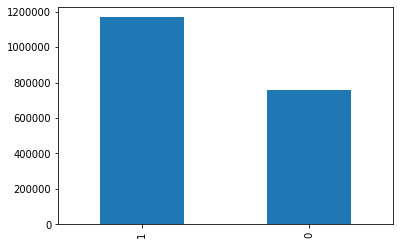

In [68]:
dataset.financiamiento_publico.value_counts().plot.bar()
dataset.financiamiento_publico.value_counts()

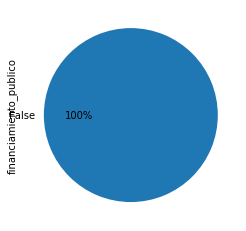

In [69]:
dataset.financiamiento_publico.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

### Clasificación (podría usarse como target)

Caso Descartado                                                                               1095789
Caso confirmado por laboratorio - No activo (por tiempo de evolución)                          642638
Caso confirmado por laboratorio - Activo Internado                                              69974
Caso confirmado por laboratorio - Activo                                                        58242
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                         34916
Caso confirmado por laboratorio - Fallecido                                                     23159
Caso confirmado por criterio clínico-epidemiológico  - No activo (por tiempo de evolución)       1468
Caso confirmado por criterio clínico - epidemiológico -  Activo internado                         200
Caso confirmado por criterio clinico-epidemiológico - Activo                                      129
Caso confirmado por criterio clínico-epidemiologico - Fallecido                   

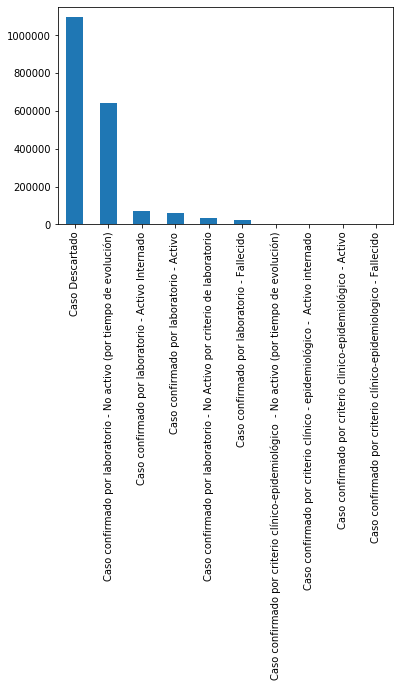

In [70]:
dataset.clasificacion.value_counts().plot.bar()
dataset.clasificacion.value_counts()

Descartado    1095789
Confirmado     830807
Name: clasificacion_resumen, dtype: int64

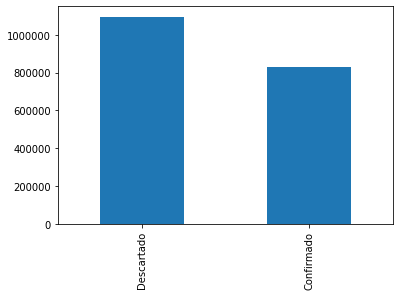

In [71]:
dataset.clasificacion_resumen.value_counts().plot.bar()
dataset.clasificacion_resumen.value_counts()

In [72]:
### One Hot Encoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['clasificacion_resumen'], prefix='clasificacion')],axis=1).drop(['clasificacion_resumen'], axis=1)

In [73]:
dataset = dataset.rename(columns={"clasificacion_Confirmado": "clasificacion_confirmado", 
                                  "clasificacion_Descartado": "clasificacion_descartado",
                                  "clasificacion_Sospechoso": "clasificacion_sospechoso",
                                  "clasificacion_Sin Clasificar": "clasificacion_sin_clasificar"})

In [74]:
# Eliminamos la columna clasificacion
dataset.drop(['clasificacion'], axis=1, inplace=True)

### Eliminamos las columnas que no utilizamos

In [75]:
dataset.drop(['id_evento_caso'], axis=1, inplace=True)

## Variable targets

### Fallecido

NO    1898669
SI      27927
Name: fallecido, dtype: int64


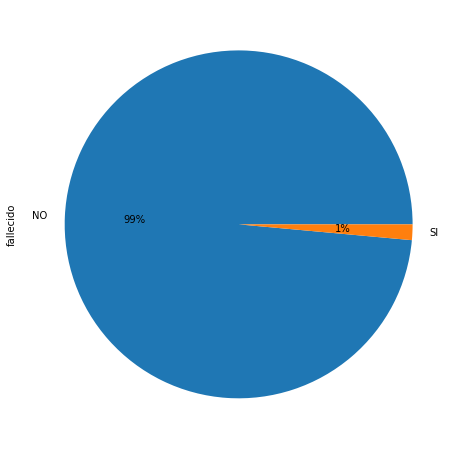

In [76]:
print(dataset.fallecido.value_counts())
dataset.fallecido.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8, 8))

In [77]:
dataset['fallecido'].unique()

array(['NO', 'SI'], dtype=object)

In [78]:
# Binarización de la variable
dataset['fallecido'] = (dataset['fallecido'] == "SI")
dataset['fallecido'] = dataset['fallecido'].astype(int)

0    1903027
1      23569
Name: cuidado_intensivo, dtype: int64


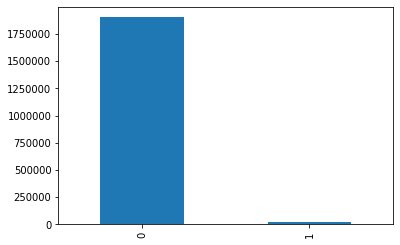

In [79]:
print(dataset.cuidado_intensivo.value_counts())
dataset.cuidado_intensivo.value_counts().plot.bar()

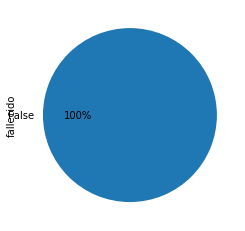

In [80]:
dataset.fallecido.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

### Dataset Limpio y Preprocesado

In [81]:
dataset = dataset.convert_dtypes()

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926596 entries, 0 to 2327032
Data columns (total 37 columns):
 #   Column                                    Dtype
---  ------                                    -----
 0   edad                                      Int64
 1   sepi_apertura                             Int64
 2   cuidado_intensivo                         Int64
 3   fallecido                                 Int64
 4   asistencia_respiratoria_mecanica          Int64
 5   financiamiento_publico                    Int64
 6   sexo_f                                    UInt8
 7   sexo_m                                    UInt8
 8   sexo_nr                                   UInt8
 9   pcia_rec_eq_pcia_car                      Int64
 10  residencia_provincia_buenos_aires         UInt8
 11  residencia_provincia_caba                 UInt8
 12  residencia_provincia_catamarca            UInt8
 13  residencia_provincia_chaco                UInt8
 14  residencia_provincia_chubut       

In [83]:
dataset

,edad,sepi_apertura,cuidado_intensivo,fallecido,asistencia_respiratoria_mecanica,financiamiento_publico,sexo_f,sexo_m,sexo_nr,pcia_rec_eq_pcia_car,...,residencia_provincia_san_juan,residencia_provincia_san_luis,residencia_provincia_santa_cruz,residencia_provincia_santa_fe,residencia_provincia_santiago_del_estero,residencia_provincia_tierra_del_fuego,residencia_provincia_tucuman,fecha_di_dif_fecha_ap,clasificacion_confirmado,clasificacion_descartado
0,53,23,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,8,0,1
1,21,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,40,23,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,58,23,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,26,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327028,39,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
2327029,33,23,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,11,1,0
2327030,42,23,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2327031,30,23,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Próximos pasos

- Normalizar los valores del dataset
- Separar los conjuntos de datos en train - test
- Experimentar con modelos

### StandardScaler

In [84]:
# Consultar: ¿es conveniente StandardScaler para NN o MinMaxScaler? ¿Se está 'normalizando' correctamente?
from sklearn.preprocessing import StandardScaler

def data_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

### Separar los conjuntos de train y test

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
feature_names = list(dataset.columns)
feature_names.remove('fallecido')
feature_names

['edad',
 'sepi_apertura',
 'cuidado_intensivo',
 'asistencia_respiratoria_mecanica',
 'financiamiento_publico',
 'sexo_f',
 'sexo_m',
 'sexo_nr',
 'pcia_rec_eq_pcia_car',
 'residencia_provincia_buenos_aires',
 'residencia_provincia_caba',
 'residencia_provincia_catamarca',
 'residencia_provincia_chaco',
 'residencia_provincia_chubut',
 'residencia_provincia_Corrientes',
 'residencia_provincia_cordoba',
 'residencia_provincia_entre_rios',
 'residencia_provincia_formosa',
 'residencia_provincia_jujuy',
 'residencia_provincia_la_pampa',
 'residencia_provincia_la_rioja',
 'residencia_provincia_mendoza',
 'residencia_provincia_misiones',
 'residencia_provincia_neuquen',
 'residencia_provincia_rio_negro',
 'residencia_provincia_salta',
 'residencia_provincia_san_juan',
 'residencia_provincia_san_luis',
 'residencia_provincia_santa_cruz',
 'residencia_provincia_santa_fe',
 'residencia_provincia_santiago_del_estero',
 'residencia_provincia_tierra_del_fuego',
 'residencia_provincia_tucuman',
 

In [87]:
X = dataset[feature_names]
y = dataset['fallecido']

In [88]:
X.shape, y.shape

((1926596, 36), (1926596,))

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1541276, 36), (385320, 36), (1541276,), (385320,))

In [91]:
INPUT_COLUMNS = X_train.shape[1]
INPUT_COLUMNS

36

### MinMaxScaler

In [93]:
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.fit_transform(X_test)

In [94]:
from tensorflow.keras.utils import to_categorical

y_train_cat= to_categorical(y_train)
y_test_cat = to_categorical(y_test)

/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lucas/DIPLODATOS/.venv/lib/python3.6/site-packages/tensorf

## Modelado

In [95]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall

In [96]:
# Hyperparameters
N_EPOCHS = 50
BATCH_SIZE = 128

In [97]:
# MLP Architecture
mlp_model = Sequential([   
    Dense(2048, input_shape=(INPUT_COLUMNS, )),
    Activation('relu'),
    
    Dense(1024),
    Activation('relu'),
    Dropout(0.50),
    
    Dense(1024),
    Activation('relu'),
    Dropout(0.50),
    
    Dense(1024),
    Activation('relu'),
    Dropout(0.50),
    
    Dense(512),
    Activation('relu'),
    Dropout(0.50),
    
    Dense(512),
    Activation('relu'),
    Dropout(0.50),
    
    
    Dense(256),
    Activation('relu'),   
    
    Dense(256),
    Activation('relu'),   
    
    Dense(128),
    Activation('relu'),
    
    Dense(128),
    Activation('relu'),
    
    Dense(2),
    Activation('softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [98]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              75776     
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
activation_2 (Activation)    (None, 1024)              0

In [99]:
mlp_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['Precision', 'Recall',],
)

In [100]:
path_checkpoint = "./models/best_model.h5"
#Callbacks
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
model_checkpoint = ModelCheckpoint(path_checkpoint, monitor='val_precision', mode='max', verbose=1, save_best_only=True)

In [101]:
history_mlp = mlp_model.fit(
    X_train_minmax, 
    y_train_cat,
    epochs=N_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(
        X_test_minmax,
        y_test_cat,
    ),
    callbacks = [early_stopping, model_checkpoint]
)

Train on 1541276 samples, validate on 385320 samples
Epoch 1/50
1541120/1541276 [============================>.] - ETA: 0s - loss: 0.0770 - precision: 0.9855 - recall: 0.9855
Epoch 00001: loss improved from -inf to 0.07703, saving model to ./models/best_model.h5
1541276/1541276 [==============================] - 76s 49us/sample - loss: 0.0770 - precision: 0.9855 - recall: 0.9855 - val_loss: 0.0765 - val_precision: 0.9857 - val_recall: 0.9857
Epoch 2/50
1540224/1541276 [============================>.] - ETA: 0s - loss: 0.0761 - precision: 0.9855 - recall: 0.9855
Epoch 00002: loss did not improve from 0.07703
1541276/1541276 [==============================] - 74s 48us/sample - loss: 0.0761 - precision: 0.9855 - recall: 0.9855 - val_loss: 0.0751 - val_precision: 0.9857 - val_recall: 0.9857
Epoch 3/50
1541248/1541276 [============================>.] - ETA: 0s - loss: 0.0760 - precision: 0.9855 - recall: 0.9855
Epoch 00003: loss did not improve from 0.07703
1541276/1541276 [================

Epoch 24/50
1540352/1541276 [============================>.] - ETA: 0s - loss: 0.0760 - precision: 0.9855 - recall: 0.9855
Epoch 00024: loss did not improve from 0.07703
1541276/1541276 [==============================] - 72s 47us/sample - loss: 0.0760 - precision: 0.9855 - recall: 0.9855 - val_loss: 0.0751 - val_precision: 0.9857 - val_recall: 0.9857
Epoch 25/50
1540480/1541276 [============================>.] - ETA: 0s - loss: 0.0760 - precision: 0.9855 - recall: 0.9855
Epoch 00025: loss did not improve from 0.07703
1541276/1541276 [==============================] - 73s 47us/sample - loss: 0.0760 - precision: 0.9855 - recall: 0.9855 - val_loss: 0.0750 - val_precision: 0.9857 - val_recall: 0.9857
Epoch 26/50
1541248/1541276 [============================>.] - ETA: 0s - loss: 0.0760 - precision: 0.9855 - recall: 0.9855
Epoch 00026: loss did not improve from 0.07703
1541276/1541276 [==============================] - 73s 47us/sample - loss: 0.0760 - precision: 0.9855 - recall: 0.9855 - val

### Evaluación del Modelo

#### Métrica Precision

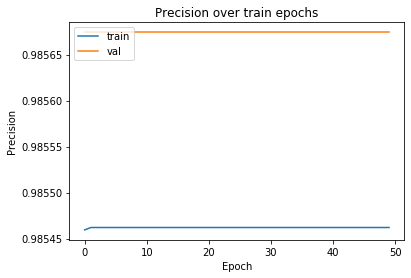

In [102]:
%matplotlib inline

plt.plot(history_mlp.history['precision'], label='train')
plt.plot(history_mlp.history['val_precision'], label='val')
plt.title('Precision over train epochs')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [106]:
print('Max MLP precision train: ', max(history_mlp.history['precision']))
print('Max MLP precision validation: ', max(history_mlp.history['val_precision']))

Max MLP precision train:  0.98546207
Max MLP precision validation:  0.98567426


#### Métrica Recall

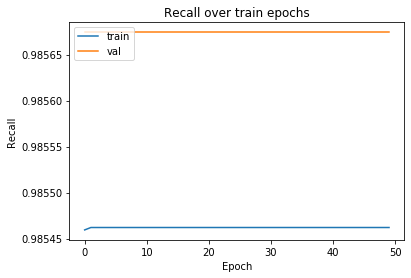

In [104]:
plt.plot(history_mlp.history['recall'], label='train')
plt.plot(history_mlp.history['val_recall'], label='val')
plt.title('Recall over train epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [107]:
print('Max MLP recall train: ', max(history_mlp.history['recall']))
print('Max MLP recall validation: ', max(history_mlp.history['val_recall']))

Max MLP recall train:  0.98546207
Max MLP recall validation:  0.98567426


### Predicciones

In [1]:
import random as rnd

In [262]:
mlp_model = load_model(path_checkpoint)

In [263]:
def pre_processing(x):
    x = x[feature_names].values
    x = np.reshape(x,(-1, 1))
    x = mm_scaler.fit_transform(x)
    return np.array([x.flatten()])

In [264]:
classes = {
    0: 'Sobrevive',
    1: 'Fallece'
}

In [267]:
for _ in range(10):
    index = rnd.randint(0, 385320)
    print('Index: ', index)
    
    x_predict = X_test.iloc[index]
    y_real = y_test.iloc[index]
    x_predict = pre_processing(x_predict)
    prediction = mlp_model.predict(x_predict)
    y_predict = np.argmax(prediction)
    
    msg = classes[y_predict] + '(predicción = {0} | confianza: '.format(y_predict) + ' {0} %)'.format(prediction[y_predict][0])
    if (y_real == y_predict):
        print('Predicción exitosa: ' + msg)
    else:
        print('Predicción errónea: ' + msg)

Index:  239240
Predicción exitosa: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
Index:  329097
Predicción exitosa: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
Index:  116062
Predicción exitosa: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
Index:  204672
Predicción exitosa: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
Index:  344235
Predicción exitosa: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
Index:  63786
Predicción exitosa: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
Index:  143526
Predicción errónea: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
Index:  336639
Predicción exitosa: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
Index:  2252
Predicción exitosa: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
Index:  74063
Predicción exitosa: Sobrevive(predicción = 0 | confianza:  0.991115927696228 %)
